# Apple Leaf Disease Detection

### GOAL :- In this project we will detect 3 apple disease
  - 1. Apple_black_rot
  - 2. Apple_cedar_rust
  - 3. Apple_scab

### Approaches/Procedure/Steps :-
  - (1). Load the DataSet
  - (2). loading Dataset For Training And Testing
  - (3). Built a Model(CNN)
  - (4). Fit the model
  - (5). Prediction
  - (6). Solution/Treatment

## (1) Load the DataSet

In [21]:
import os

def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files
Train_Apple_black_rot=r'c:\Apple\train\Apple_black_rot'
Train_Apple_cedar_rust=r'c:\Apple\train\Apple_cedar_rust'
Train_Apple_scab=r'c:\Apple\Train\Apple_scab'

Test_Apple_black_rot=r'c:\Apple\test\Apple_black_rot'
Test_Apple_cedar_rust=r'c:\Apple\test\Apple_cedar_rust'
Test_Apple_scab=r'c:\Apple\test\Apple_scab'

print("Number of Apple_black_rot leaf images : ", total_files(Train_Apple_black_rot))
print("Number of Apple_cedar_rust leaf images : ", total_files(Train_Apple_cedar_rust))
print("Number of Apple_scab leaf images : ", total_files(Train_Apple_scab))

print("Number of Apple_black_rot leaf images : ", total_files(Test_Apple_black_rot))
print("Number of Apple_cedar_rust leaf images : ", total_files(Test_Apple_cedar_rust))
print("Number of Apple_scab leaf images : ", total_files(Test_Apple_scab))

Number of Apple_black_rot leaf images :  170
Number of Apple_cedar_rust leaf images :  160
Number of Apple_scab leaf images :  150
Number of Apple_black_rot leaf images :  128
Number of Apple_cedar_rust leaf images :  128
Number of Apple_scab leaf images :  128


In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)


## (2) loading  Dataset For Training And Testing

In [23]:
# Training
train_generator = train_datagen.flow_from_directory(r'c:\Apple\train',
                                                    target_size=(225, 225),
                                                    batch_size=32,
                                                    class_mode='categorical')
# Testing
validation_generator = test_datagen.flow_from_directory(r'c:\Apple\test',
                                                        target_size=(225, 225),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 480 images belonging to 3 classes.
Found 384 images belonging to 3 classes.


## (3) Built a Model(CNN)

In [24]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(225, 225, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))



c:\aaa\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [25]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## (4) Fit the model

In [26]:
history = model.fit(train_generator, batch_size=16, epochs=5, validation_data=validation_generator, validation_batch_size=16)

Epoch 1/5


c:\aaa\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.4129 - loss: 1.7416 - val_accuracy: 0.5521 - val_loss: 0.8749
Epoch 2/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 16s 944ms/step - accuracy: 0.7868 - loss: 0.5576 - val_accuracy: 0.9375 - val_loss: 0.2330
Epoch 3/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 15s 876ms/step - accuracy: 0.8964 - loss: 0.2430 - val_accuracy: 0.9245 - val_loss: 0.2030
Epoch 4/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 16s 924ms/step - accuracy: 0.9405 - loss: 0.1775 - val_accuracy: 0.9479 - val_loss: 0.1587
Epoch 5/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 15s 865ms/step - accuracy: 0.9485 - loss: 0.1391 - val_accuracy: 0.9766 - val_loss: 0.0967


## (5) Prediction

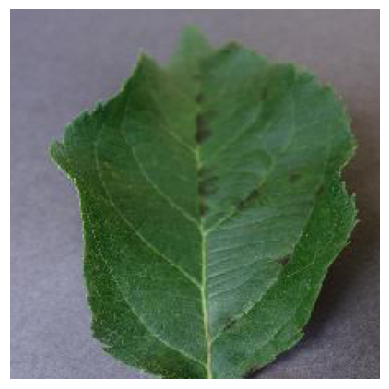

In [27]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

x = preprocess_image(r'C:\Apple\train\Apple_scab\Scab (37).JPG')

# Display the image
plt.imshow(x[0])
plt.axis('off')
plt.show()

In [28]:
predictions = model.predict(x)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


array([0.06859535, 0.00631404, 0.9250906 ], dtype=float32)

In [29]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
labels

{0: 'Apple_black_rot', 1: 'Apple_cedar_rust', 2: 'Apple_scab'}

In [30]:
predicted_label = labels[np.argmax(predictions)]
print('Predicted Image Leaf is : ',predicted_label)

Predicted Image Leaf is :  Apple_scab


## (6) Solution/Treatment

In [31]:
labels = train_generator.class_indices

# No need to invert the dictionary if labels are strings
predicted_label = list(labels.keys())[np.argmax(predictions)]
print('Predicted Image Leaf is : ', predicted_label)

if predicted_label == 'Apple_black_rot':
    print('Predicted Image Leaf is:', predicted_label)
    print('Solution of Apple_black_rot:')
    print('Task1')
elif predicted_label == 'Apple_cedar_rust':
    print('Predicted Image Leaf is:', predicted_label)
    print('Solution of Apple_cedar_rust:')
    print('Task2')
else:
    print('Predicted Image Leaf is:', predicted_label)
    print('Solution of Apple_scab:')
    print('Task3')


Predicted Image Leaf is :  Apple_scab
Predicted Image Leaf is: Apple_scab
Solution of Apple_scab:
Task3


# *********************************************************************

# Thank you!

In [32]:
from keras.models import load_model

# Assuming you have a trained model named 'model'
# Save the model
model.save('model.h5')


# *********************************************************************